In [4]:
import numpy as np
import matplotlib.pyplot as plt

def Boundary_conditions(U_initial, U_top, U_bottom, U_right, U_left):
    return U_initial, U_top, U_bottom, U_right, U_left

def Temprature_dist_2D(plate_length, Maximum_iterartion_time, alpha, delta_x):
    delta_t = (delta_x ** 2)/(4 * alpha)
    gamma = (alpha * delta_t) / (delta_x ** 2)
    u = np.empty((Maximum_iterartion_time, plate_length, plate_length))
    u.fill(U_initial)
    u[:, (plate_length-1):, :] = U_top
    u[:, :, :1] = U_left
    u[:, :1, 1:] = U_bottom
    u[:, :, (plate_length-1):] = U_right
    
    for k in range(0, Maximum_iterartion_time-1, 1):
        for i in range(1, plate_length-1, delta_x):
            for j in range(1, plate_length-1, delta_x):
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]

    return u

def plotheatmap(u_k, k):
    plt.clf()
    plt.figure(figsize=(10, 6))
    plt.xlabel("Space (x)")
    plt.ylabel("Space (y)")
    plt.rcParams.update({'font.size': 22})
    plt.pcolormesh(u_k, vmin=20, vmax=60)
    plt.colorbar()

    return plt

def save_data(Maximum_iterartion_time):
    for i in range(0,Maximum_iterartion_time-1):
        name = 'Add you local directory' + str(i) + '.tif'
    plotheatmap(Temp_Dist[i], i)
    plt.axis('off')
    plt.savefig(name, dpi=20) #chnage the resolutions as required



<Figure size 432x288 with 0 Axes>

<Figure size 720x432 with 0 Axes>

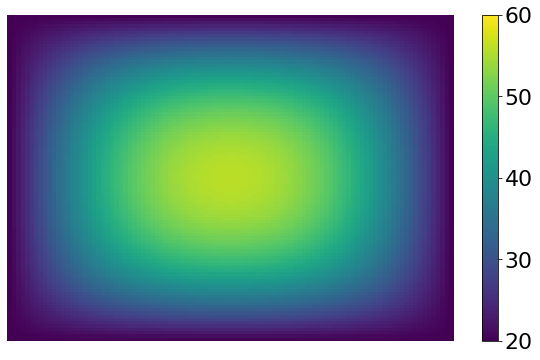

In [5]:
#Boundry conditions
U_initial, U_top, U_bottom, U_right, U_left= Boundary_conditions(60,20,20,20,20)
#2D distribution
Temp_Dist= Temprature_dist_2D(100,1000,2,1)
#plotting
plotheatmap(Temp_Dist[500], 10)
